In [1]:
# necessary imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import ipykernel
import notebook.notebookapp
import requests
import json

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

### Dataframe with customers identified by customer_id

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
print(customers.shape)
customers.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Dataframe with latitude/lontitude information for each zip_code; useful for locating customers in a map

In [4]:
geo_location = pd.read_csv('olist_geolocation_dataset.csv')
print(geo_location.shape)
geo_location.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Dataframe with the products (identified by product_id) in each order (identified by order_id)

In [6]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
print(order_items.shape)
order_items.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Dataframe with the order paymenets identified by order_id

In [8]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
print(order_payments.shape)
order_payments.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Dataframe with the customer order reviews identified by order_id

In [10]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
print(order_reviews.shape)
order_reviews.head()

(100000, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Dataframe with orders; each order is identified by an order_id and also has a customer_id

In [12]:
orders = pd.read_csv('olist_orders_dataset.csv')
print(orders.shape)
orders.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Dataframe with products that the platform sells identified by product_id

In [14]:
products = pd.read_csv('olist_products_dataset.csv')
print(products.shape)
products.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Dataframe with sellers identified by sellers_id

In [16]:
sellers = pd.read_csv('olist_sellers_dataset.csv')
print(sellers.shape)
sellers.head()

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Dataframe with products category taranslated to english identified by product categroy name

In [18]:
product_category = pd.read_csv('product_category_name_translation.csv')
print(product_category.shape)
product_category.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# Relationship diagram of different datasets

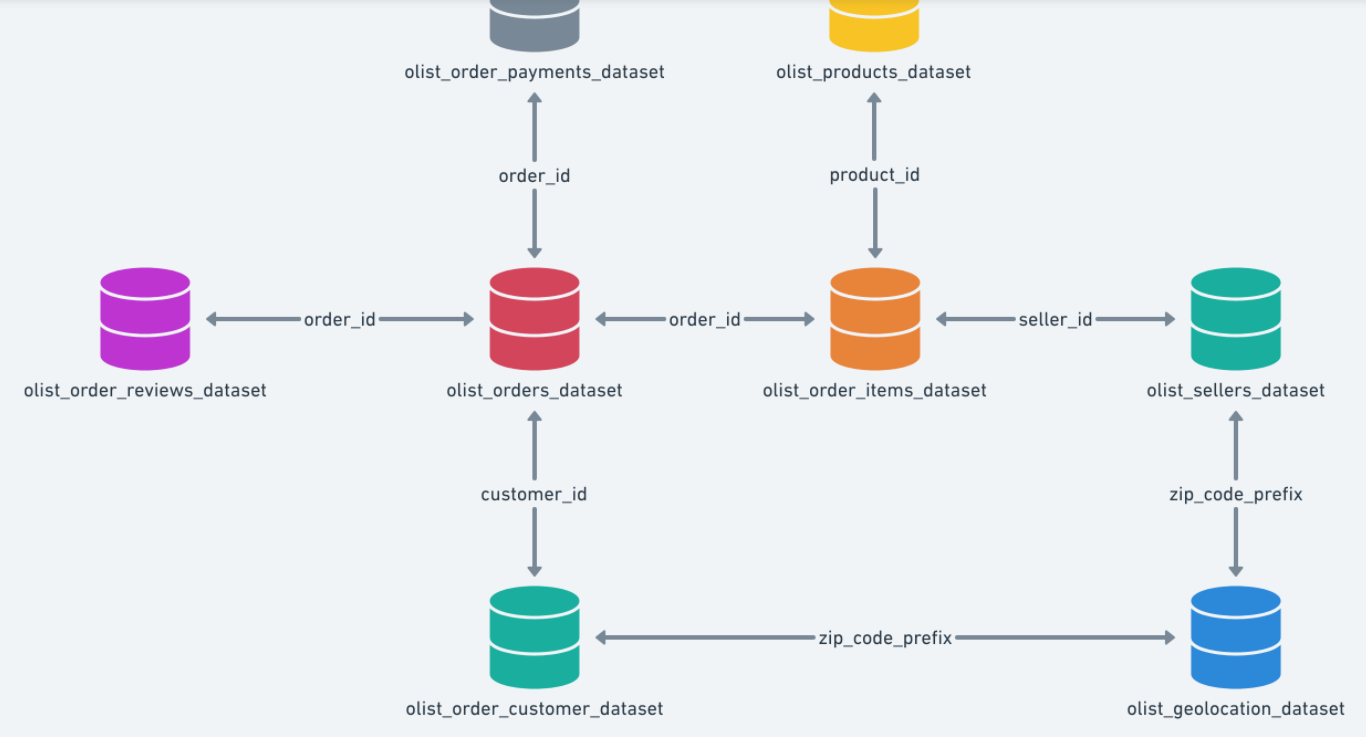

### Merging all the dataframes

In [21]:
# merged_df.shape

(17093845, 44)

## Merging relevant datasets

In [34]:
# except geo-location
merged_df = pd.merge(orders,customers,on='customer_id')
merged_df = pd.merge(merged_df,order_reviews,on='order_id')
merged_df = pd.merge(merged_df,order_payments,on='order_id')
merged_df = pd.merge(merged_df,order_items,on='order_id')
merged_df = pd.merge(merged_df,products,on='product_id')
merged_df = pd.merge(merged_df,sellers,on='seller_id')
merged_df = pd.merge(merged_df, product_category,on ='product_category_name')
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares


In [40]:
len(merged_df['customer_unique_id'].unique())

94087

In [35]:
merged_df.shape

(116581, 40)

In [37]:
len(merged_df['customer_id'].unique())

97255

In [43]:
len(merged_df['product_category_name_english'].unique())

71

In [38]:
len(merged_df['customer_unique_id'].unique()) * len(merged_df['product_category_name_english'].unique()) - len(merged_df)

6788524

In [42]:
ratings_matrix = pd.DataFrame(columns=merged_df['product_category_name_english'].unique(), index=merged_df['customer_unique_id'].unique())
ratings_matrix

,housewares,baby,cool_stuff,sports_leisure,toys,furniture_decor,perfumery,health_beauty,music,pet_shop,...,dvds_blu_ray,flowers,cds_dvds_musicals,security_and_services,tablets_printing_image,furniture_bedroom,cine_photo,diapers_and_hygiene,books_imported,la_cuisine
7c396fd4830fd04220f754e42b4e5bff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3a51803cc0d012c3b5dc8b7528cb05f7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ef0996a1a279c26e7ecbd737be23d235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e781fdcc107d13d865fc7698711cc572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7a1de9bde89aedca8c5fbad489c5571c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96328ac15f58fbb232fe14b182103382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9b8844d7cceb1277e6508cce966e4a09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6c861f46d09c560422f6ba6b33c017fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6968d41eb700f1ea39424e04b854bf7e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
ratings_matrix = pd.DataFrame(columns=merged_df['product_category_name_english'].unique(), index=merged_df['customer_unique_id'].unique())
for index, row in merged_df.iterrows():
    ratings_matrix.at[row['customer_unique_id'], row['product_category_name_english']] = row['review_score']
ratings_matrix

,housewares,baby,cool_stuff,sports_leisure,toys,furniture_decor,perfumery,health_beauty,music,pet_shop,...,dvds_blu_ray,flowers,cds_dvds_musicals,security_and_services,tablets_printing_image,furniture_bedroom,cine_photo,diapers_and_hygiene,books_imported,la_cuisine
7c396fd4830fd04220f754e42b4e5bff,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3a51803cc0d012c3b5dc8b7528cb05f7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ef0996a1a279c26e7ecbd737be23d235,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e781fdcc107d13d865fc7698711cc572,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7a1de9bde89aedca8c5fbad489c5571c,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96328ac15f58fbb232fe14b182103382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
9b8844d7cceb1277e6508cce966e4a09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
6c861f46d09c560422f6ba6b33c017fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
6968d41eb700f1ea39424e04b854bf7e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [45]:
ratings_matrix.isnull().sum(axis=1)

7c396fd4830fd04220f754e42b4e5bff    69
3a51803cc0d012c3b5dc8b7528cb05f7    70
ef0996a1a279c26e7ecbd737be23d235    70
e781fdcc107d13d865fc7698711cc572    70
7a1de9bde89aedca8c5fbad489c5571c    69
                                    ..
96328ac15f58fbb232fe14b182103382    70
9b8844d7cceb1277e6508cce966e4a09    70
6c861f46d09c560422f6ba6b33c017fe    70
6968d41eb700f1ea39424e04b854bf7e    70
d8b80a0bd7560fab10e804f36d99fe33    70
Length: 94087, dtype: int64

## Matrix factorization 

In [50]:
from surprise import SVD
from surprise.dataset import Reader, Dataset

In [51]:
ratings_matrix

,housewares,baby,cool_stuff,sports_leisure,toys,furniture_decor,perfumery,health_beauty,music,pet_shop,...,dvds_blu_ray,flowers,cds_dvds_musicals,security_and_services,tablets_printing_image,furniture_bedroom,cine_photo,diapers_and_hygiene,books_imported,la_cuisine
7c396fd4830fd04220f754e42b4e5bff,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3a51803cc0d012c3b5dc8b7528cb05f7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ef0996a1a279c26e7ecbd737be23d235,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e781fdcc107d13d865fc7698711cc572,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7a1de9bde89aedca8c5fbad489c5571c,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96328ac15f58fbb232fe14b182103382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
9b8844d7cceb1277e6508cce966e4a09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
6c861f46d09c560422f6ba6b33c017fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
6968d41eb700f1ea39424e04b854bf7e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [52]:
customer_ids, product_ids, ratings = [], [], []

for customer_id, row in ratings_matrix.iterrows():
    for product_id in ratings_matrix.columns:
        rating = row[product_id] 
        if not np.isnan(rating): 
            customer_ids.append(customer_id)
            product_ids.append(product_id)
            ratings.append(rating)
ratings_df = pd.DataFrame({'customer_id':customer_ids, 'product_id':product_ids, 'rating':ratings})
ratings_df = ratings_df[['customer_id', 'product_id', 'rating']] 
ratings_df

,customer_id,product_id,rating
0,7c396fd4830fd04220f754e42b4e5bff,housewares,4
1,7c396fd4830fd04220f754e42b4e5bff,baby,5
2,3a51803cc0d012c3b5dc8b7528cb05f7,housewares,4
3,ef0996a1a279c26e7ecbd737be23d235,housewares,5
4,e781fdcc107d13d865fc7698711cc572,housewares,3
...,...,...,...
96442,96328ac15f58fbb232fe14b182103382,la_cuisine,4
96443,9b8844d7cceb1277e6508cce966e4a09,la_cuisine,5
96444,6c861f46d09c560422f6ba6b33c017fe,la_cuisine,5
96445,6968d41eb700f1ea39424e04b854bf7e,la_cuisine,5


In [53]:
ratings_df.describe()

,rating
count,96447.000000
mean,4.083963
std,1.347168
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [54]:
reader = Reader(rating_scale=(1.0, 5.0))
data_surprise = Dataset.load_from_df(ratings_df, reader)
data_train_surprise = data_surprise.build_full_trainset()

In [55]:
n_factors = 500 # get 500 factors
lr_all = 0.005 # default value
reg_all = 0.02 # default value
#
model = SVD(n_factors=n_factors, lr_all=lr_all, reg_all=reg_all)
model.fit(data_train_surprise)

In [58]:
customer_id = '7c396fd4830fd04220f754e42b4e5bff'
missing_product_ids = ratings_matrix[ratings_matrix.isna()].loc[customer_id].index
missing_product_ids

Index(['housewares', 'baby', 'cool_stuff', 'sports_leisure', 'toys',
       'furniture_decor', 'perfumery', 'health_beauty', 'music', 'pet_shop',
       'computers', 'construction_tools_construction',
       'signaling_and_security', 'auto', 'watches_gifts', 'audio',
       'electronics', 'computers_accessories', 'telephony', 'consoles_games',
       'stationery', 'party_supplies', 'fashion_male_clothing',
       'fashio_female_clothing', 'food', 'costruction_tools_tools',
       'fashion_bags_accessories', 'garden_tools', 'office_furniture',
       'furniture_living_room', 'market_place', 'bed_bath_table',
       'home_confort', 'art', 'home_construction', 'air_conditioning',
       'agro_industry_and_commerce', 'fixed_telephony', 'musical_instruments',
       'luggage_accessories', 'fashion_sport', 'fashion_shoes',
       'home_appliances', 'small_appliances_home_oven_and_coffee',
       'small_appliances', 'construction_tools_lights',
       'kitchen_dining_laundry_garden_furniture'

In [59]:
customer_id = '7c396fd4830fd04220f754e42b4e5bff'
missing_product_ids = ratings_matrix[ratings_matrix.isna()].loc[customer_id].index
recommendations = []
for product_id in missing_product_ids: 
    r = model.predict(customer_id, product_id, verbose=False).est 
    recommendations.append((product_id, r))
    #print(movie_id)
    #break
recommendations.sort(reverse=True, key=lambda x: x[1])
recommendations[:5]

[('pet_shop', 5.0),
 ('baby', 4.9572592459190705),
 ('home_appliances_2', 4.839351087400192),
 ('cine_photo', 4.789424742506415),
 ('health_beauty', 4.6979894514269365)]

## Splitting into the train & test set

In [63]:
ratings_matrix

,housewares,baby,cool_stuff,sports_leisure,toys,furniture_decor,perfumery,health_beauty,music,pet_shop,...,dvds_blu_ray,flowers,cds_dvds_musicals,security_and_services,tablets_printing_image,furniture_bedroom,cine_photo,diapers_and_hygiene,books_imported,la_cuisine
7c396fd4830fd04220f754e42b4e5bff,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3a51803cc0d012c3b5dc8b7528cb05f7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ef0996a1a279c26e7ecbd737be23d235,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e781fdcc107d13d865fc7698711cc572,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7a1de9bde89aedca8c5fbad489c5571c,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96328ac15f58fbb232fe14b182103382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
9b8844d7cceb1277e6508cce966e4a09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
6c861f46d09c560422f6ba6b33c017fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
6968d41eb700f1ea39424e04b854bf7e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [65]:
customer_ids, product_ids, ratings = [], [], []

for customer_id, row in ratings_matrix.iterrows():
    for product_id in ratings_matrix.columns:
        rating = row[product_id] # rating given by a perticular user to perticular product
        if not np.isnan(rating): # if there is a rating
            customer_ids.append(customer_id)
            product_ids.append(product_id)
            ratings.append(rating)
ratings_df = pd.DataFrame({'customer_id':customer_ids, 'product_id':product_ids, 'rating':ratings})
ratings_df = ratings_df[['customer_id', 'product_id', 'rating']] # correct order
ratings_df

,customer_id,product_id,rating
0,7c396fd4830fd04220f754e42b4e5bff,housewares,4
1,7c396fd4830fd04220f754e42b4e5bff,baby,5
2,3a51803cc0d012c3b5dc8b7528cb05f7,housewares,4
3,ef0996a1a279c26e7ecbd737be23d235,housewares,5
4,e781fdcc107d13d865fc7698711cc572,housewares,3
...,...,...,...
96442,96328ac15f58fbb232fe14b182103382,la_cuisine,4
96443,9b8844d7cceb1277e6508cce966e4a09,la_cuisine,5
96444,6c861f46d09c560422f6ba6b33c017fe,la_cuisine,5
96445,6968d41eb700f1ea39424e04b854bf7e,la_cuisine,5


In [ ]:
train_ind, test_ind = [], []
#
for product_id in ratings_df['product_id'].unique():
    rows = ratings_df[ratings_df['product_id'] == product_id]
    ind = rows.index[:2].values.tolist()
    train_ind += ind
#
c = 0.7
b = len(train_ind) / len(ratings_df)
a = (c - b) / (1 - b)
print(a)
#
all_ind = set(range(len(ratings_df)))
not_used = list(all_ind - set(train_ind))
not_done = True
np.random.seed(42)
while not_done:
    np.random.shuffle(not_used)
    train_ind_ = train_ind + not_used[:int(a * len(not_used))]
    df_train = ratings_df.loc[train_ind_]
    print(ratings_df.nunique()['product_id'], df_train.nunique()['product_id'])
    print(ratings_df.nunique()['customer_id'], df_train.nunique()['customer_id'])
    if ratings_df.nunique()['product_id'] == df_train.nunique()['product_id'] and ratings_df.nunique()['customer_id'] == df_train.nunique()['customer_id']:
        not_done = False
        train_ind = train_ind_
#
test_ind = list(all_ind - set(train_ind))
#
train_ind = sorted(train_ind)
test_ind = sorted(test_ind)
print(len(train_ind)/len(all_ind))
print(len(test_ind)/len(all_ind))
#
np.savetxt('data_train.csv', train_ind, fmt="%d")# saving the train data
np.savetxt('data_test.csv', test_ind, fmt="%d")# saving the test data